In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import  numpy as np
sns.set(style='whitegrid')

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [7]:
df['Age'].isna().sum()

0

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
print(df['Embarked'].mode()[0])

S


In [10]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
df['Has_Cabin'] = df['Cabin'].notna().astype(int)

In [13]:
df.drop('Cabin',axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Has_Cabin    891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [16]:
df['Has_Cabin'].value_counts()

Has_Cabin
0    687
1    204
Name: count, dtype: int64

In [17]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

Text(0.5, 1.0, 'Fare Distribution')

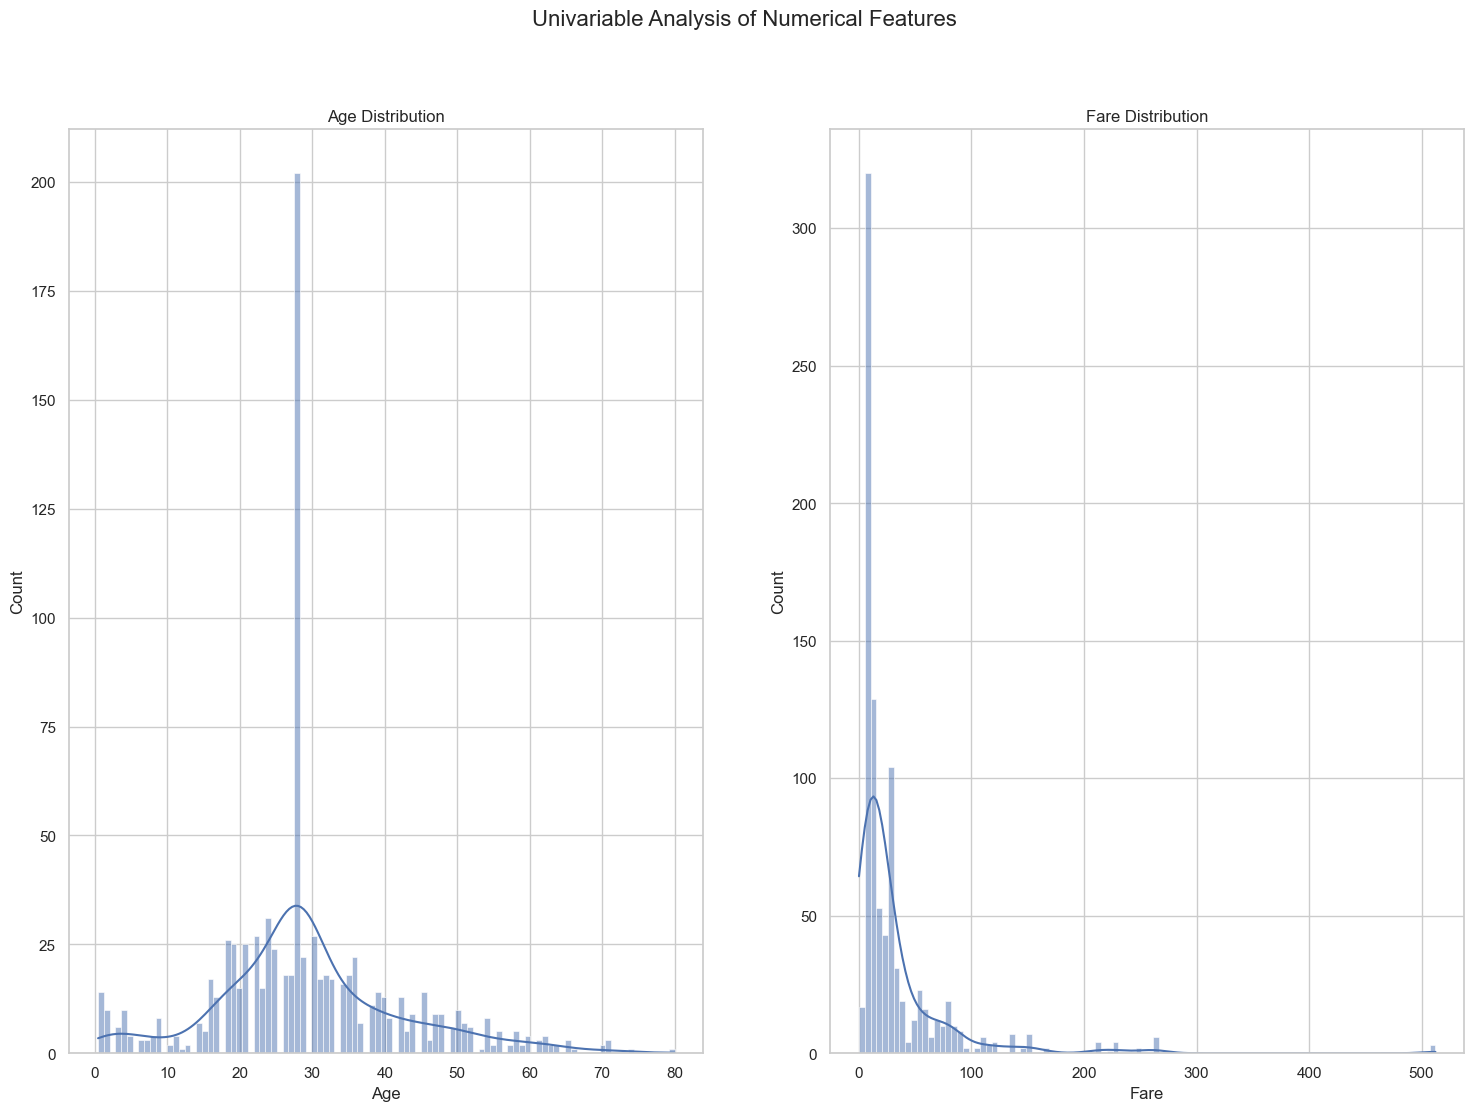

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(18, 12))
fig.suptitle('Univariable Analysis of Numerical Features' , fontsize = 16)

sns.histplot(ax = axes[0],x = df['Age'],kde=True,bins =100).set_title('Age Distribution')
sns.histplot(ax = axes[1],x = df['Fare'],kde=True,bins =100).set_title('Fare Distribution')

Bi-Variate Analysis : Feature vs Surrvival


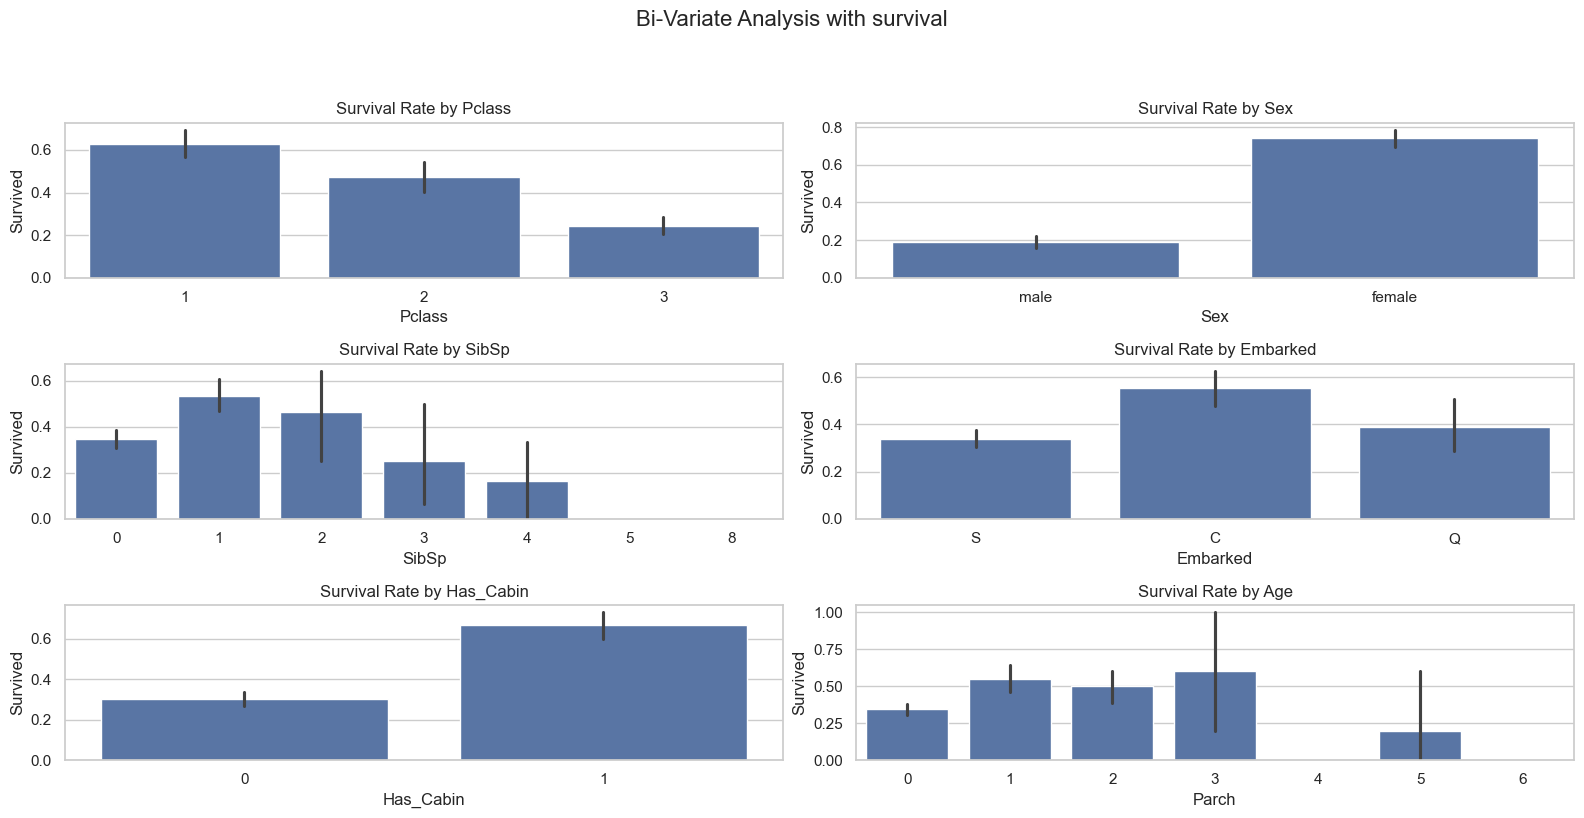

In [19]:
print("Bi-Variate Analysis : Feature vs Surrvival")
fig, axes = plt.subplots(3,2, figsize=(16,12))
fig.suptitle('Bi-Variate Analysis with survival' , fontsize = 16)
sns.barplot(ax = axes [0,0] , x='Pclass' , y = 'Survived' , data = df).set_title('Survival Rate by Pclass')
sns.barplot(ax = axes [0,1] , x='Sex' , y = 'Survived' , data = df).set_title('Survival Rate by Sex')
sns.barplot(ax = axes [1,0] , x='SibSp' , y = 'Survived' , data = df).set_title('Survival Rate by SibSp')
sns.barplot(ax = axes [1,1] , x='Embarked' , y = 'Survived' , data = df).set_title('Survival Rate by Embarked')
sns.barplot(ax = axes [2,0] , x='Has_Cabin' , y = 'Survived' , data = df).set_title('Survival Rate by Has_Cabin')
sns.barplot(ax = axes [2,1] , x='Parch' , y = 'Survived' , data = df).set_title('Survival Rate by Age')
plt.tight_layout(rect=[0,0.3,1,0.95])
 

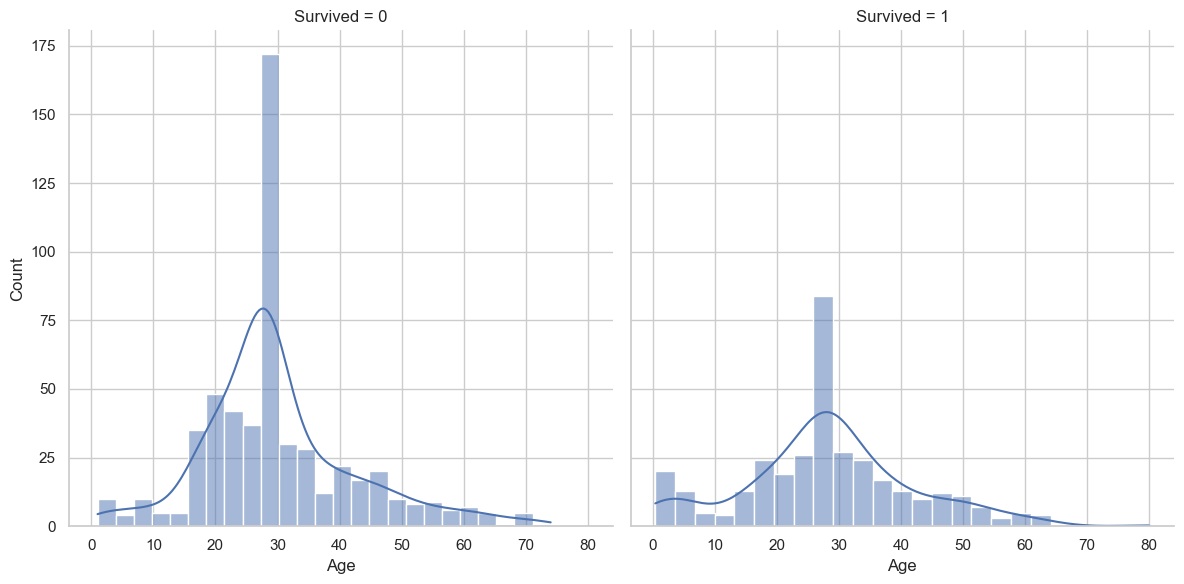

In [20]:
g = sns.FacetGrid(df,col='Survived',height=6)
g.map(sns.histplot , 'Age',bins=25,kde=True)

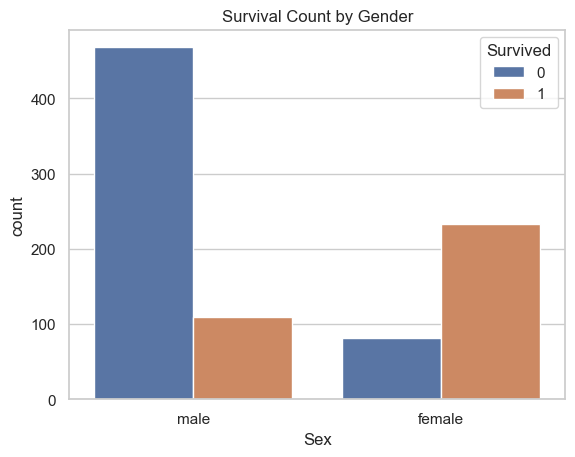

In [21]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.show()

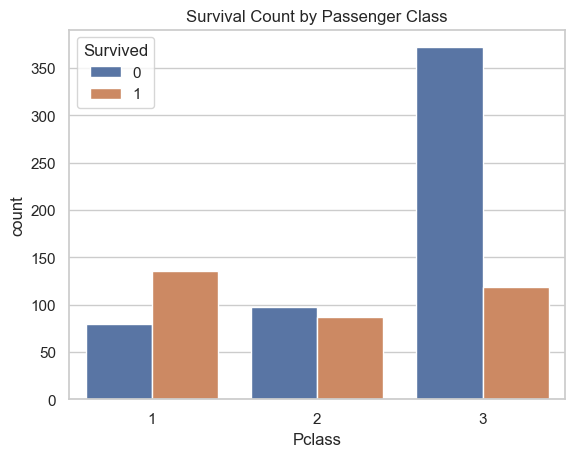

In [22]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.show()

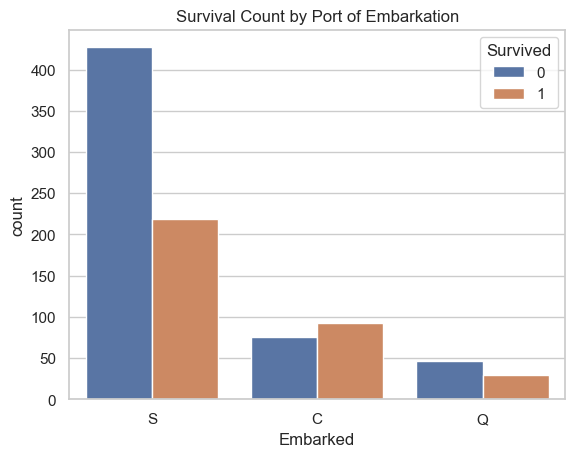

In [23]:
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival Count by Port of Embarkation')
plt.show()

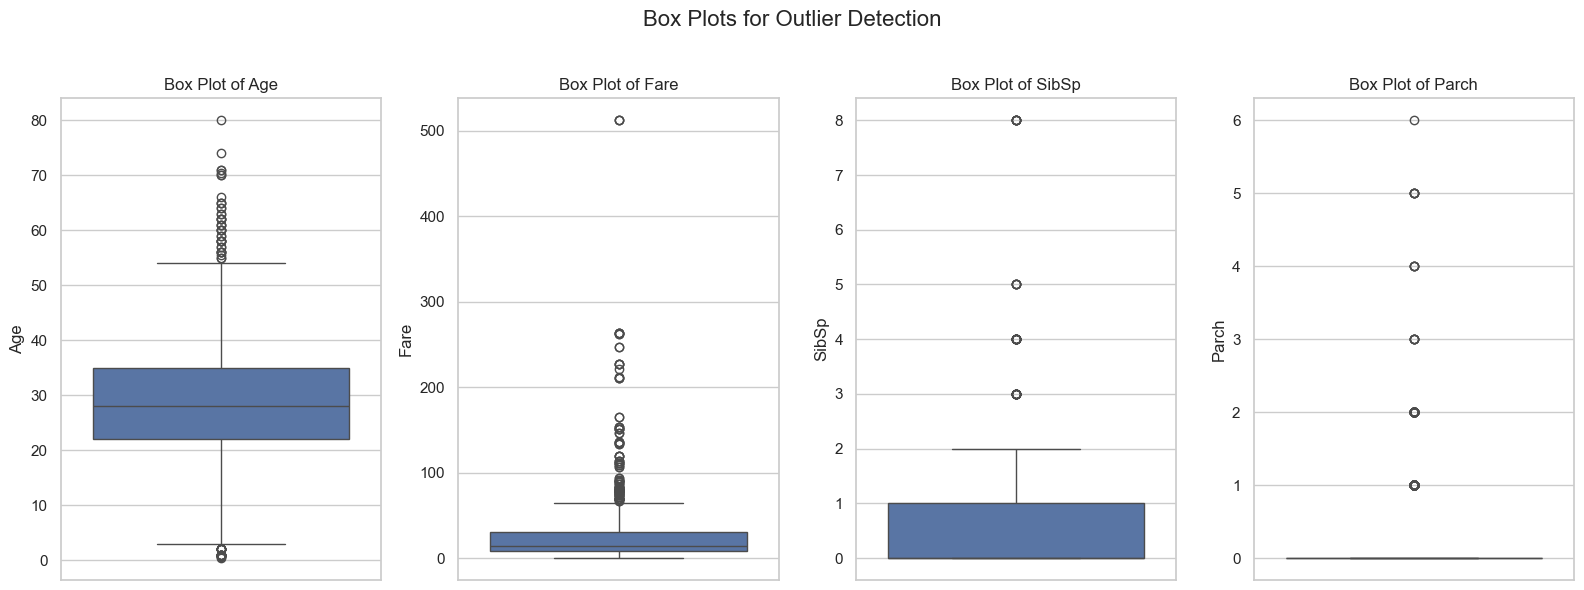

In [24]:
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(16, 6))
fig.suptitle('Box Plots for Outlier Detection', fontsize=16)

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])

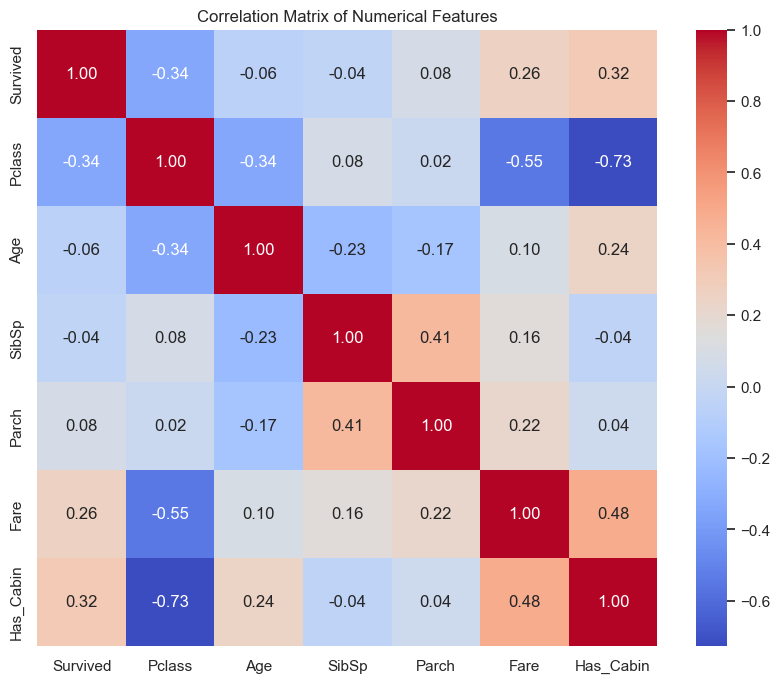

In [25]:
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin']

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

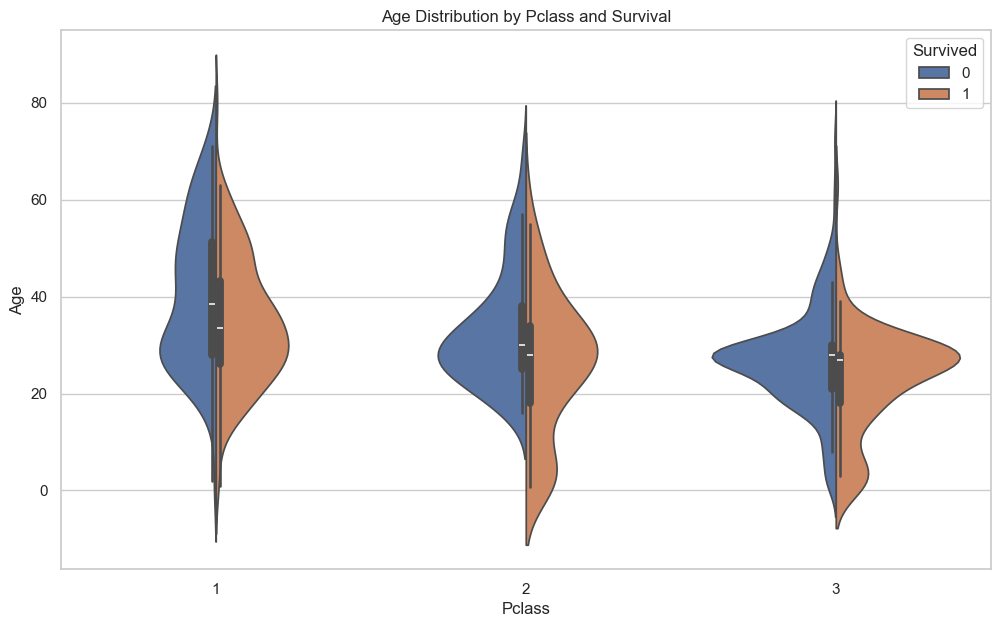

In [26]:
plt.figure(figsize=(12, 7))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True)
plt.title('Age Distribution by Pclass and Survival')
plt.show()

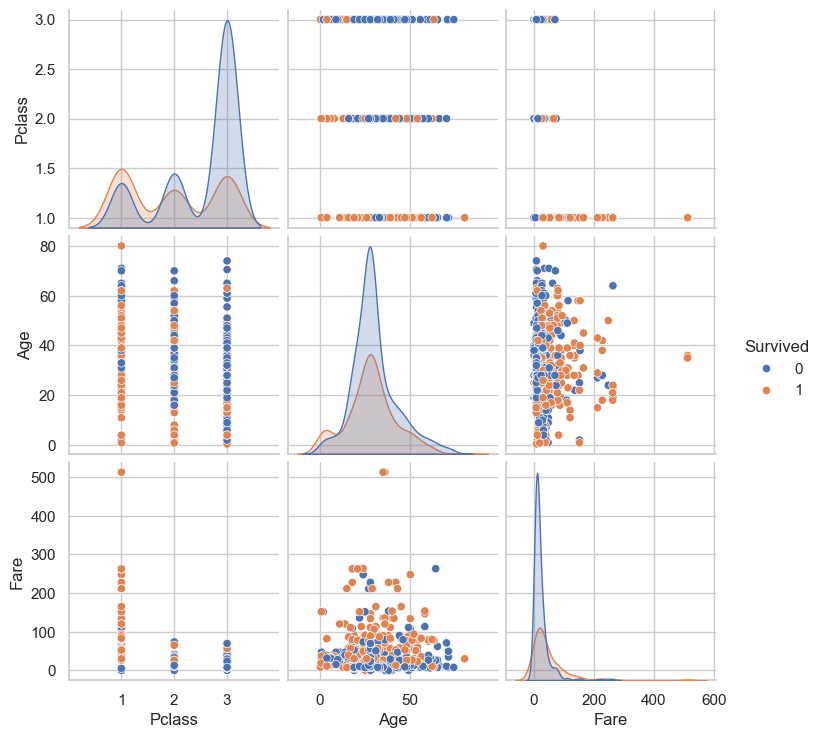

In [27]:
cols_for_pairplot = ['Survived', 'Pclass', 'Age', 'Fare']

sns.pairplot(df[cols_for_pairplot], hue='Survived', diag_kind='kde')
plt.show()

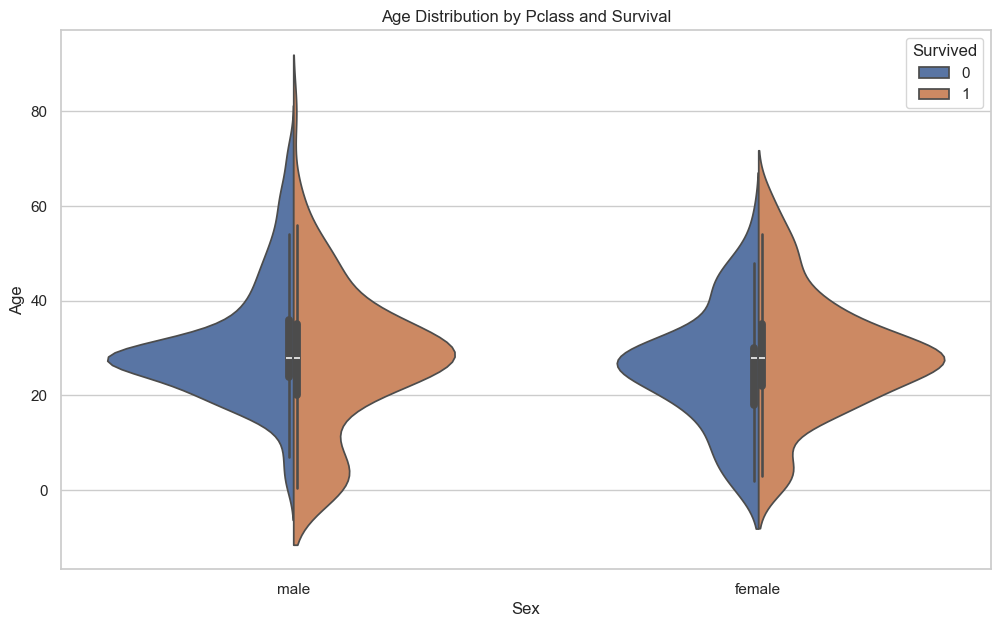

In [28]:
plt.figure(figsize=(12, 7))
sns.violinplot(data=df, x='Sex', y='Age', hue='Survived', split=True)
plt.title('Age Distribution by Pclass and Survival')
plt.show()

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Titanic Dataset Profile")


In [36]:
profile.to_file("titanic_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 528.98it/s]
c:\Users\VEDAG\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 9 0 9 0 0 9 0 0 0 9 9 0 0 0 0 0 0 0 0 0 9 0 9 0 0 0 9 0 0 0 9 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 9 9 0 0 0 0 0 9 9 0 0 0 9 0 0 0 0 0 0 0
 0 9 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 9 0 0 0 9 9 0 0 0 0 9 0 0 0 0 0 0 0 9
 0 0 0 0 0 0 0 9 0 0 0 0 9 9 0 0 0 9 0 0 0 0 0 0 0 9 9 0 9 0 0 0 0 0 0 0 0
 9 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 9 0 0 0 9 0 0 9 0 0 0 0 0 9 0
 9 0 0 0 0 0 0 0 9 9 9 0 0 0 0 0 0 0 0 0 9 0 0 0 9 0 0 0 0 0 9 0 0 9 0 0 0
 0 0 9 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 9 0 0 9 9 0 0 0 0 9 0
 0 0 0 9 9 0 0 0 0 9 9 0 0 0 9 0 9 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 9 9 0 0 0
 0 9 9 9 0 0 0 9 0 9 0 9 0 9 9 9 0 0 0 0 0 0 9 9 0 0 0 0 0 9 0 9 0 9 0 9 9
 0 0 0 9 9 0 9 9 9 0 0 0 9 0 0 0 0 0 9 0 0 0 0 9 0 0 0 0 0 0 

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
!conda install -c conda-forge pandas jupyter notebook ipywidgets ydata-profiling

Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done
done

## Package Plan ##

  environment location: C:\Users\VEDAG\anaconda3

  added / updated specs:
    - ipywidgets
    - ydata-profiling


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |       4_kmp_llvm           8 KB  conda-forge
    bottleneck-1.5.0           |  py312h1a27103_0         127 KB  conda-forge
    brotli-1.0.9               |       hcfcfb64_9          20 KB  conda-forge
    brotli-bin-1.0.9           |       hcfcfb64_9          22 KB  conda-forge
    brotli-python-1.0.9        |  py312h5da7b33_9         347 KB
    ca-certificates-2025.8.3   |       h4c7d964_0         151 KB  conda-forge
    certifi-2025.8.3           |     pyhd8ed1ab_0  